In [1]:
import numpy as np
import pandas as pd
from mlxtend.frequent_patterns import apriori, association_rules
import matplotlib.pyplot as plt
import networkx as nx

In [8]:
movie=pd.read_csv("my_movies.csv")
movie

,V1,V2,V3,V4,V5,Sixth Sense,Gladiator,LOTR1,Harry Potter1,Patriot,LOTR2,Harry Potter2,LOTR,Braveheart,Green Mile
0,Sixth Sense,LOTR1,Harry Potter1,Green Mile,LOTR2,1,0,1,1,0,1,0,0,0,1
1,Gladiator,Patriot,Braveheart,NaN,NaN,0,1,0,0,1,0,0,0,1,0
2,LOTR1,LOTR2,NaN,NaN,NaN,0,0,1,0,0,1,0,0,0,0
3,Gladiator,Patriot,Sixth Sense,NaN,NaN,1,1,0,0,1,0,0,0,0,0
4,Gladiator,Patriot,Sixth Sense,NaN,NaN,1,1,0,0,1,0,0,0,0,0
5,Gladiator,Patriot,Sixth Sense,NaN,NaN,1,1,0,0,1,0,0,0,0,0
6,Harry Potter1,Harry Potter2,NaN,NaN,NaN,0,0,0,1,0,0,1,0,0,0
7,Gladiator,Patriot,NaN,NaN,NaN,0,1,0,0,1,0,0,0,0,0
8,Gladiator,Patriot,Sixth Sense,NaN,NaN,1,1,0,0,1,0,0,0,0,0
9,Sixth Sense,LOTR,Gladiator,Green Mile,NaN,1,1,0,0,0,0,0,1,0,1


In [10]:
movie_df=movie.iloc[:,5:]
movie_df

,Sixth Sense,Gladiator,LOTR1,Harry Potter1,Patriot,LOTR2,Harry Potter2,LOTR,Braveheart,Green Mile
0,1,0,1,1,0,1,0,0,0,1
1,0,1,0,0,1,0,0,0,1,0
2,0,0,1,0,0,1,0,0,0,0
3,1,1,0,0,1,0,0,0,0,0
4,1,1,0,0,1,0,0,0,0,0
5,1,1,0,0,1,0,0,0,0,0
6,0,0,0,1,0,0,1,0,0,0
7,0,1,0,0,1,0,0,0,0,0
8,1,1,0,0,1,0,0,0,0,0
9,1,1,0,0,0,0,0,1,0,1


# Triying to see which are the frequent movie watch together by changing the Support value:

In [16]:
# function to compute the frequent movie set
def frequent_movies(suppport, length):
    frequent_itemsets = apriori(movie_df, min_support=suppport, max_len=length,use_colnames = True)
    return frequent_itemsets 

In [17]:
def plotting_frequent_movies(rules, x=20,y=20):
    fig, ax=plt.subplots(figsize=(x,y))
    graph=nx.from_pandas_edgelist(rules,source="antecedents",target='consequents')
    nx.draw(graph,with_labels=True)
    plt.show()

# Building the model

In [18]:
fi_1 = frequent_movies(0.12, 3)
fi_1.sort_values('support',ascending = False,inplace=True)
fi_1.sort_values

<bound method DataFrame.sort_values of     support                           itemsets
1       0.7                        (Gladiator)
0       0.6                      (Sixth Sense)
4       0.6                          (Patriot)
10      0.6               (Patriot, Gladiator)
7       0.5           (Sixth Sense, Gladiator)
8       0.4             (Patriot, Sixth Sense)
12      0.4  (Patriot, Sixth Sense, Gladiator)
2       0.2                            (LOTR1)
3       0.2                    (Harry Potter1)
5       0.2                            (LOTR2)
6       0.2                       (Green Mile)
9       0.2          (Sixth Sense, Green Mile)
11      0.2                     (LOTR2, LOTR1)>

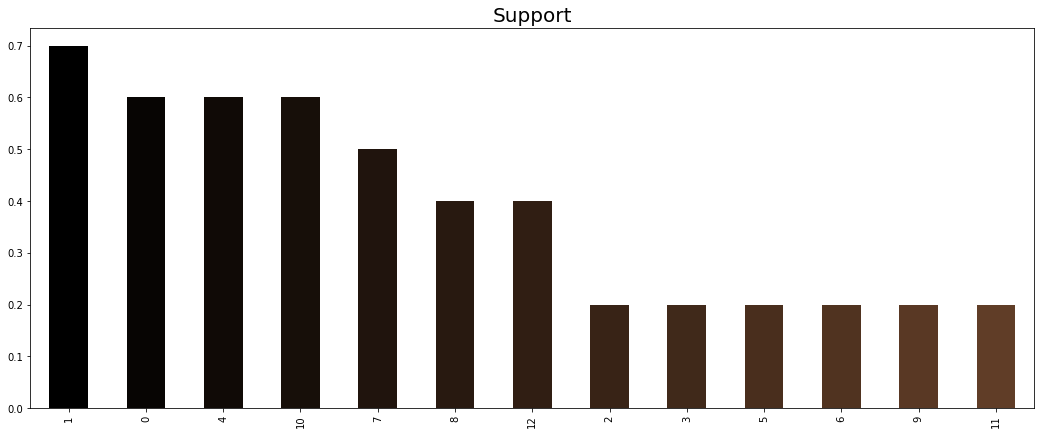

In [19]:
plt.rcParams['figure.figsize'] = (18, 7)
color = plt.cm.copper(np.linspace(0, 1, 40))
fi_1["support"].plot.bar(color = color)
plt.title('Support', fontsize = 20)
plt.xticks(rotation = 90)
plt.show()

# Observation: Gladiator are the most  popular movie and Sixth Sense are the second most plpular movie  in the dataset

In [20]:
Rules=association_rules(fi_1, metric="lift",min_threshold=1)
Rules.sort_values('lift',ascending= False).head(10)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
14,(LOTR2),(LOTR1),0.2,0.2,0.2,1.000000,5.000000,0.16,inf
15,(LOTR1),(LOTR2),0.2,0.2,0.2,1.000000,5.000000,0.16,inf
12,(Sixth Sense),(Green Mile),0.6,0.2,0.2,0.333333,1.666667,0.08,1.2
13,(Green Mile),(Sixth Sense),0.2,0.6,0.2,1.000000,1.666667,0.08,inf
1,(Gladiator),(Patriot),0.7,0.6,0.6,0.857143,1.428571,0.18,2.8
0,(Patriot),(Gladiator),0.6,0.7,0.6,1.000000,1.428571,0.18,inf
6,"(Patriot, Sixth Sense)",(Gladiator),0.4,0.7,0.4,1.000000,1.428571,0.12,inf
11,(Gladiator),"(Patriot, Sixth Sense)",0.7,0.4,0.4,0.571429,1.428571,0.12,1.4
8,"(Sixth Sense, Gladiator)",(Patriot),0.5,0.6,0.4,0.800000,1.333333,0.10,2.0
9,(Patriot),"(Sixth Sense, Gladiator)",0.6,0.5,0.4,0.666667,1.333333,0.10,1.5


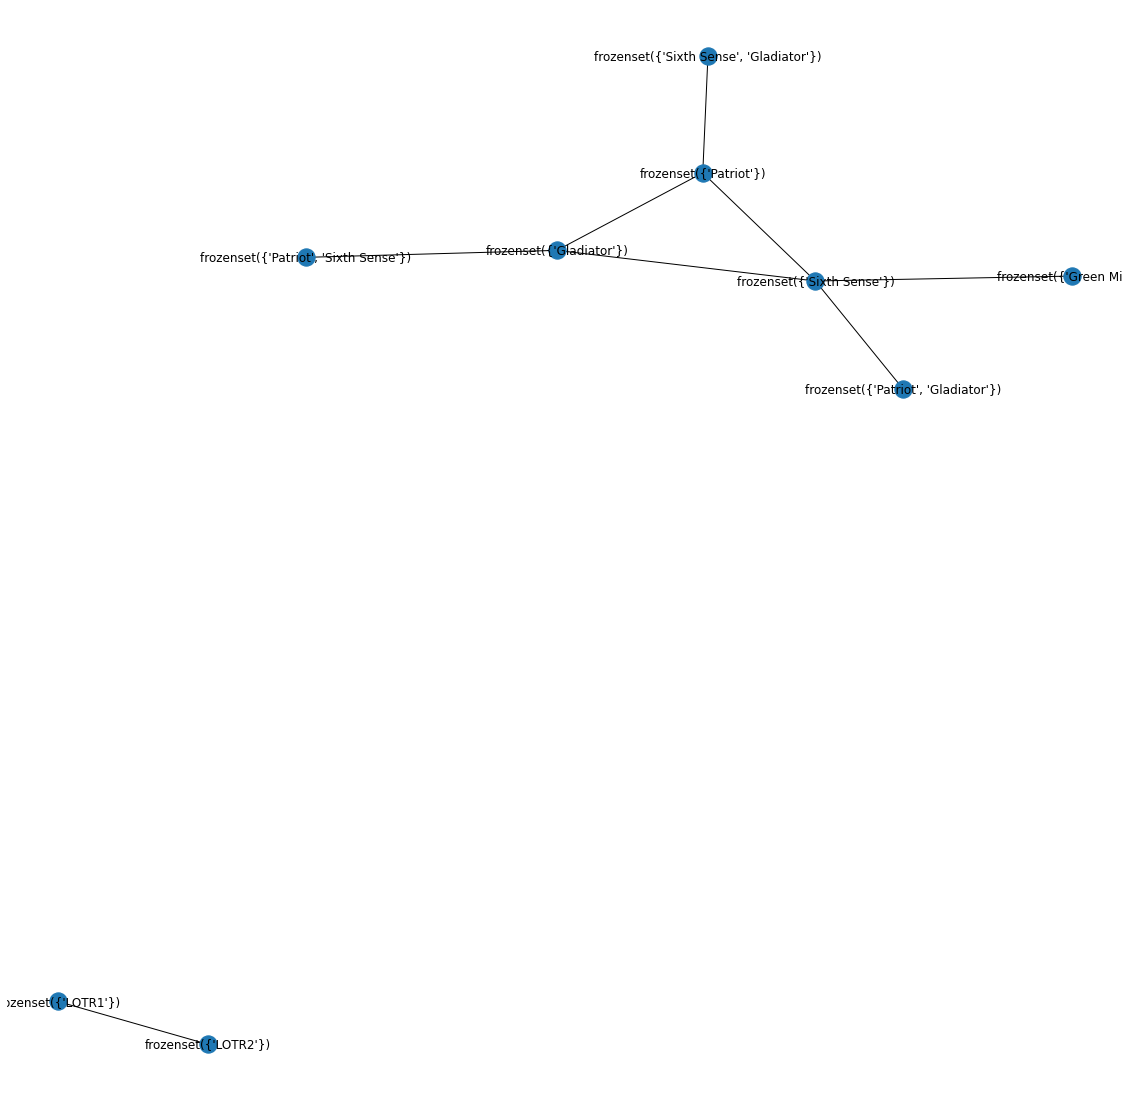

In [22]:
plotting_frequent_movies(Rules)

## Reducing the support value

In [32]:
fi_2=frequent_movies(0.1,3)
fi_2.sort_values('support',ascending=False,inplace=True)

In [33]:
fi_2.sort_values

<bound method DataFrame.sort_values of     support                                  itemsets
1       0.7                               (Gladiator)
0       0.6                             (Sixth Sense)
17      0.6                      (Patriot, Gladiator)
4       0.6                                 (Patriot)
10      0.5                  (Sixth Sense, Gladiator)
13      0.4                    (Patriot, Sixth Sense)
30      0.4         (Patriot, Sixth Sense, Gladiator)
3       0.2                           (Harry Potter1)
9       0.2                              (Green Mile)
5       0.2                                   (LOTR2)
2       0.2                                   (LOTR1)
22      0.2                            (LOTR2, LOTR1)
16      0.2                 (Sixth Sense, Green Mile)
36      0.1       (Sixth Sense, LOTR2, Harry Potter1)
31      0.1            (Sixth Sense, LOTR, Gladiator)
32      0.1      (Sixth Sense, Green Mile, Gladiator)
33      0.1       (Sixth Sense, Harry Potte

In [34]:
Rule2=association_rules(fi_2,metric='lift',min_threshold=1)
Rule2.sort_values('lift',ascending=False).head(20)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
82,"(Green Mile, Gladiator)",(LOTR),0.1,0.1,0.1,1.0,10.0,0.09,inf
83,(LOTR),"(Green Mile, Gladiator)",0.1,0.1,0.1,1.0,10.0,0.09,inf
81,"(LOTR, Gladiator)",(Green Mile),0.1,0.2,0.1,1.0,5.0,0.08,inf
72,(LOTR),(Green Mile),0.1,0.2,0.1,1.0,5.0,0.08,inf
71,(Green Mile),"(Sixth Sense, LOTR2)",0.2,0.1,0.1,0.5,5.0,0.08,1.8
66,"(Sixth Sense, LOTR2)",(Green Mile),0.1,0.2,0.1,1.0,5.0,0.08,inf
65,(LOTR1),"(LOTR2, Harry Potter1)",0.2,0.1,0.1,0.5,5.0,0.08,1.8
63,(LOTR2),"(Harry Potter1, LOTR1)",0.2,0.1,0.1,0.5,5.0,0.08,1.8
60,"(LOTR2, Harry Potter1)",(LOTR1),0.1,0.2,0.1,1.0,5.0,0.08,inf
59,(Green Mile),"(Sixth Sense, Harry Potter1)",0.2,0.1,0.1,0.5,5.0,0.08,1.8


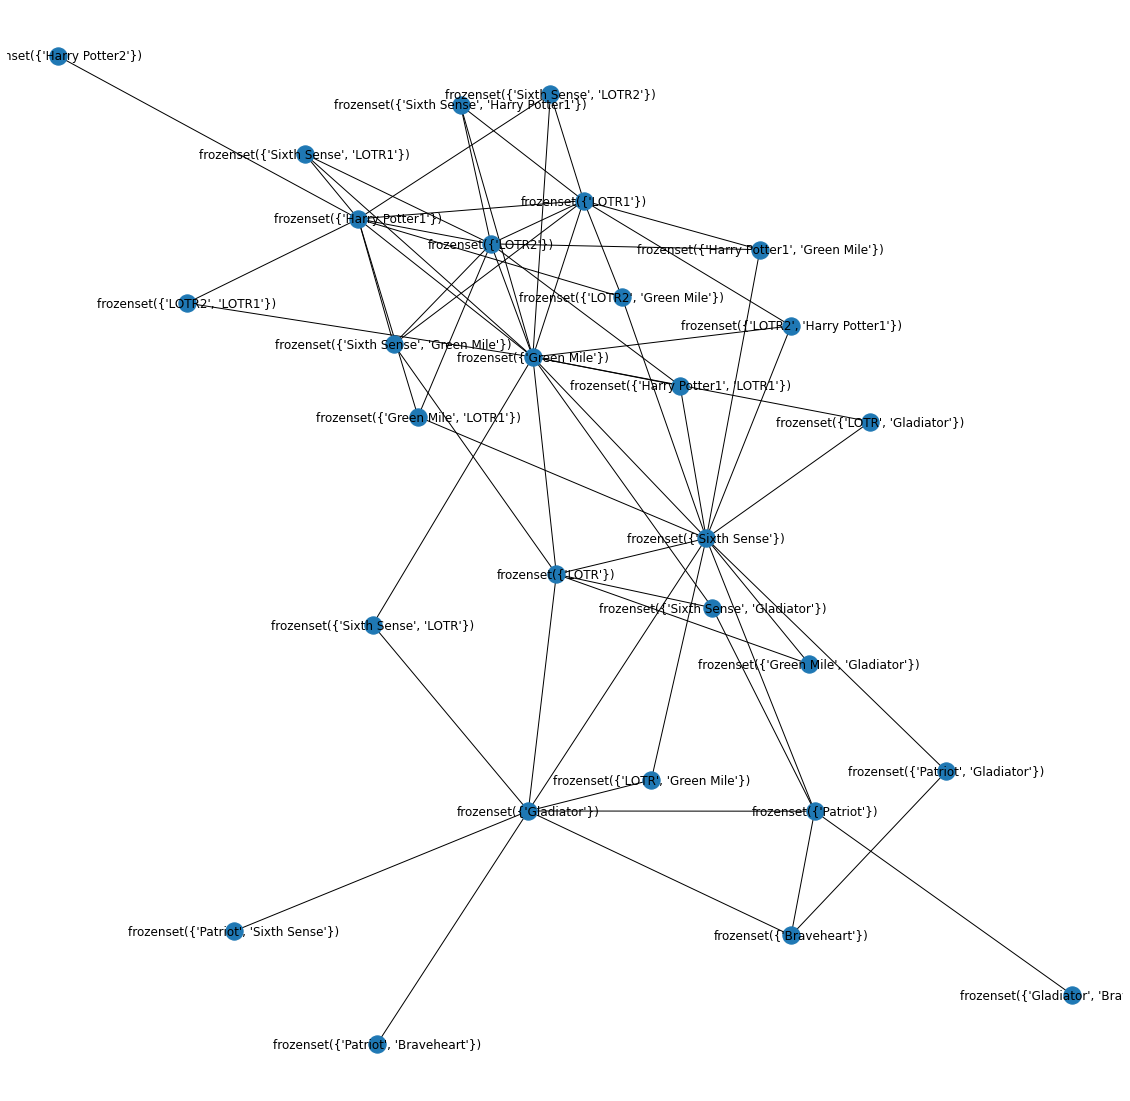

In [35]:
plotting_frequent_movies(Rule2)

## Observation: We can see that when the support value is decreased the movie popularity increase and therefore we can see more movie in the above plot. This is because much more movie pass the support value threshold

In [41]:
#Increasing the support value and decreasing the minimum value to 2:

fi_3 = frequent_itemsets(0.15, 2)
fi_3.sort_values('support',ascending=False,inplace=True)
fi_3.sort_values

<bound method DataFrame.sort_values of     support                   itemsets
1       0.7                (Gladiator)
0       0.6              (Sixth Sense)
4       0.6                  (Patriot)
10      0.6       (Patriot, Gladiator)
7       0.5   (Sixth Sense, Gladiator)
8       0.4     (Patriot, Sixth Sense)
2       0.2                    (LOTR1)
3       0.2            (Harry Potter1)
5       0.2                    (LOTR2)
6       0.2               (Green Mile)
9       0.2  (Sixth Sense, Green Mile)
11      0.2             (LOTR2, LOTR1)>

In [38]:
Rules3=association_rules(fi_3,metric='lift',min_threshold=1)
Rules3.sort_values('lift',ascending=False).head(10)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
8,(LOTR2),(LOTR1),0.2,0.2,0.2,1.000000,5.000000,0.16,inf
9,(LOTR1),(LOTR2),0.2,0.2,0.2,1.000000,5.000000,0.16,inf
6,(Sixth Sense),(Green Mile),0.6,0.2,0.2,0.333333,1.666667,0.08,1.2
7,(Green Mile),(Sixth Sense),0.2,0.6,0.2,1.000000,1.666667,0.08,inf
1,(Gladiator),(Patriot),0.7,0.6,0.6,0.857143,1.428571,0.18,2.8
0,(Patriot),(Gladiator),0.6,0.7,0.6,1.000000,1.428571,0.18,inf
2,(Sixth Sense),(Gladiator),0.6,0.7,0.5,0.833333,1.190476,0.08,1.8
3,(Gladiator),(Sixth Sense),0.7,0.6,0.5,0.714286,1.190476,0.08,1.4
4,(Patriot),(Sixth Sense),0.6,0.6,0.4,0.666667,1.111111,0.04,1.2
5,(Sixth Sense),(Patriot),0.6,0.6,0.4,0.666667,1.111111,0.04,1.2


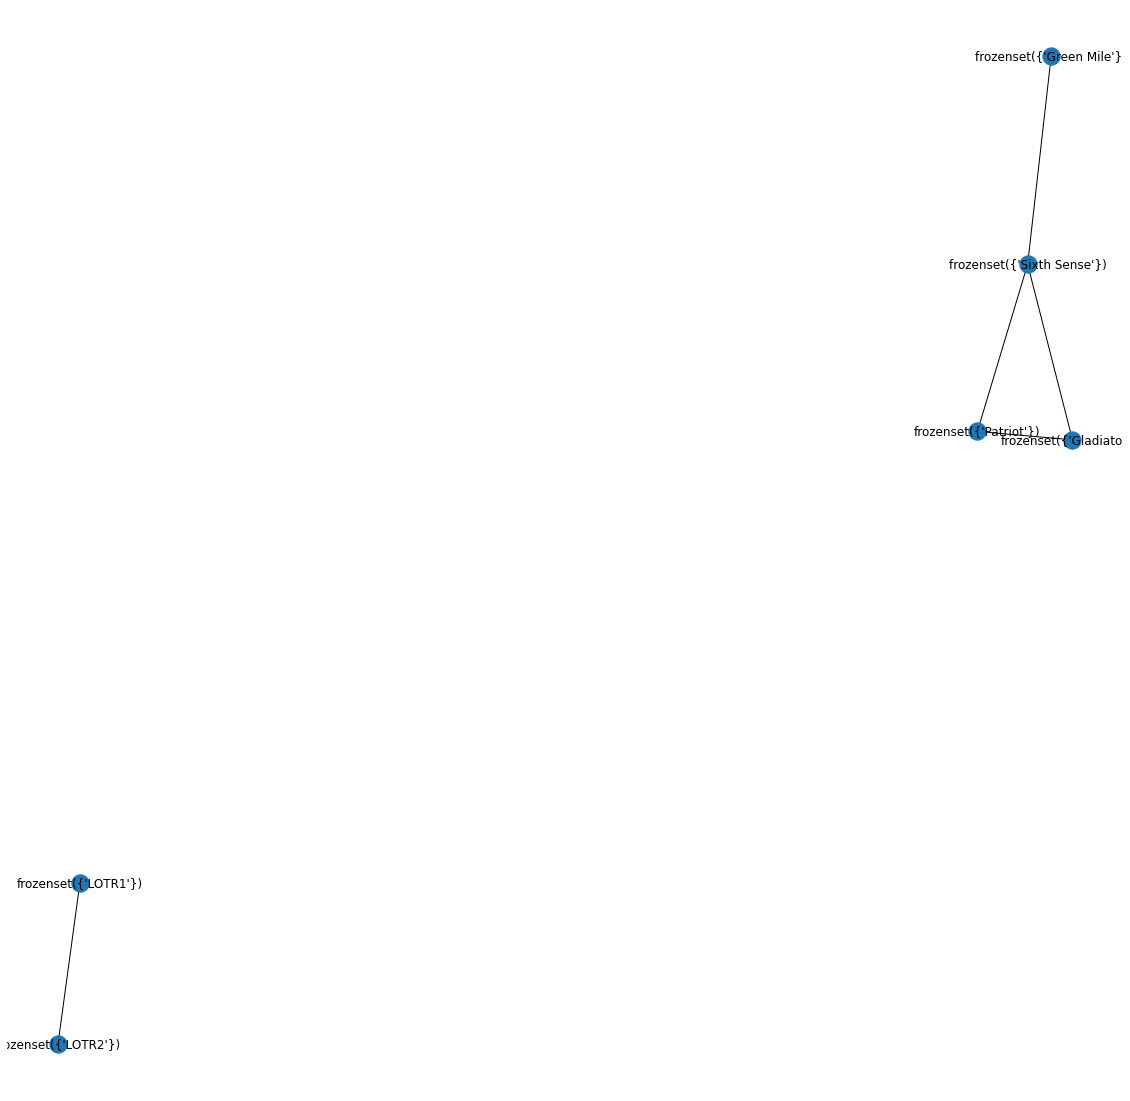

In [42]:
plotting_frequent_movies(Rules3)

#### Observation:We can see that when we increase the support value threshold and decrease the minimum items number, the items decrease and we can not see the relationship between the movies (Gladiator)	and (sixth sense)  with the other movie